In [4]:
import json
import jsonlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
dir_path = "../Data/annotations/"
ano = "open_images_train_v6_captions.jsonl"

In [5]:
image_id = []
captions = []
with jsonlines.open(dir_path+ano, 'r') as f:
    for line in f.iter():
        #if line['image_id'][0] == '0':
        image_id.append(line['image_id'])
        captions.append(line['caption'])


In [6]:
annotations = pd.DataFrame(image_id, columns=['image_id'])
annotations['caption'] = captions

In [7]:
annotations

image_id                                            caption
0       fc06c1b59dd8ca6e  We can see dolls,book and papers on bed and we...
1       5833b3358fd949b5  In this picture I can see there is a airplane ...
2       67f1e4231b964a23  This looks like a black and white poster. I ca...
3       4839f5eac98771bf  In this image I can see on the left side it is...
4       64373c6a90e7b8dd  In this picture I can see group of people sitt...
...                  ...                                                ...
507439  8cf26e4563f8c4bc  There is a lady wearing a tag and holding the ...
507440  c960dd40130f1d9a  In the image we can see there is a newspaper c...
507441  d4c2172f7f742d60  In the picture we can see table with drawers. ...
507442  60b2df9a3a7bd8d2  In this image we can see a girl. In the back t...
507443  c2a601516bf3bf91  In this image we can see so many books on the ...

[507444 rows x 2 columns]

In [27]:
path = '../../disk/Data/open_image/'

img_paths = []
img_names = []
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_paths.append(folder+'/'+img)
        img_names.append(img)
            
print('Images: ',len(img_names))


Images:  1743042


In [10]:
print(img_names[:5])

['0d602fc924a0a2a5.jpg', '0d5ad6dead4fd8d4.jpg', '0061e0fb55ff2d5c.jpg', '0abf55bf669af9c6.jpg', '0383b6b35606ce7e.jpg']


In [106]:
keyword = ['storm',
           'snowfall',
        ]
exclude_keyword = ['blazer','horse','candle',
                   'fireplace',
                   'lamp',
                   'photograph',
                   'ski','board','says','oven','cook', 'living', 'plug', 'hyr', 'food', 'young','kitchen', 'extinguisher',
                 'fireworks','vintage','department', 'kid', 'boy', 'grill','fire station','fox','engine', 'hyd','fires','jet','rocket']
k_image_id = []

In [19]:
annotations[annotations['caption'].str.contains('fire', case=False)]

image_id                                            caption
8       40c66d14998ad13a  In this image I can see a woman wearing red co...
56      7164732223313801  This is a person standing. This looks like a f...
558     faec0d8ce842e27e  This is an animated image , where there is a b...
826     de51ffcf704a22ab  In this image we can see group of vehicles par...
1025    2ad42a74006edb6f  In this picture I can see sculptures, there is...
...                  ...                                                ...
506198  70c61f3f25c634b8  In this image, I can see few people standing a...
506239  3f232d160c0d2f5d  There are three people standing. This person i...
506493  5380decd21c84b97  In this image there is a tent supported with m...
506789  6c03acbd11f6e2be  In this picture we can see a room with pillows...
506976  32f40923efae3cd6  In the image there are fire rescue vehicles an...

[2044 rows x 2 columns]

In [107]:
find = annotations[annotations['caption'].str.contains('dododo', case=False)]

for i in keyword:
    find2 = annotations[annotations['caption'].str.contains(i, case=False)]
    find = pd.concat([find,find2], ignore_index=True)
    print(f'keyword : [{i}] // found: {len(find2)}')
print(f'final : {len(find)}')
## 결측지 유발 키워드 삭제
for i in exclude_keyword:
    origin_len = len(find)
    find = find[~find['caption'].str.contains(i, case=False)]
    print(f'excluded keyword:[{i}] found: {origin_len - len(find)}')
print(f'final : {len(find)}')
## 중복 이미지 삭제 (한 이미지에 대한 여러 caption)
find.drop_duplicates(['image_id'], inplace=True ,ignore_index = True, keep = 'first')
print(f'droped duplicate images from multiple captions, After dropped: {len(find)}')
## 인덱스 정렬
find.reset_index(inplace=True, drop=True)
#find

keyword : [storm] // found: 14
keyword : [snowfall] // found: 32
final : 46
excluded keyword:[blazer] found: 0
excluded keyword:[horse] found: 0
excluded keyword:[candle] found: 0
excluded keyword:[fireplace] found: 0
excluded keyword:[lamp] found: 2
excluded keyword:[photograph] found: 0
excluded keyword:[ski] found: 0
excluded keyword:[board] found: 1
excluded keyword:[says] found: 0
excluded keyword:[oven] found: 0
excluded keyword:[cook] found: 0
excluded keyword:[living] found: 0
excluded keyword:[plug] found: 0
excluded keyword:[hyr] found: 0
excluded keyword:[food] found: 0
excluded keyword:[young] found: 0
excluded keyword:[kitchen] found: 0
excluded keyword:[extinguisher] found: 0
excluded keyword:[fireworks] found: 0
excluded keyword:[vintage] found: 0
excluded keyword:[department] found: 0
excluded keyword:[kid] found: 0
excluded keyword:[boy] found: 0
excluded keyword:[grill] found: 0
excluded keyword:[fire station] found: 0
excluded keyword:[fox] found: 0
excluded keyword:

In [ ]:
find

In [109]:
find.sort_values(by=['image_id'],ascending=True, inplace=True)
find.reset_index(drop=True, inplace=True)
tmp = find['image_id'].value_counts().index.sort_values()

In [ ]:
cnt = 4
for i,key in enumerate(tmp):
    if cnt == 4:
        print('', end='\n\n\n\n')
        print(f'{(i+1)/4}.')
        cnt = 0
    print(f"'{key}'", end=' ')
    cnt+=1


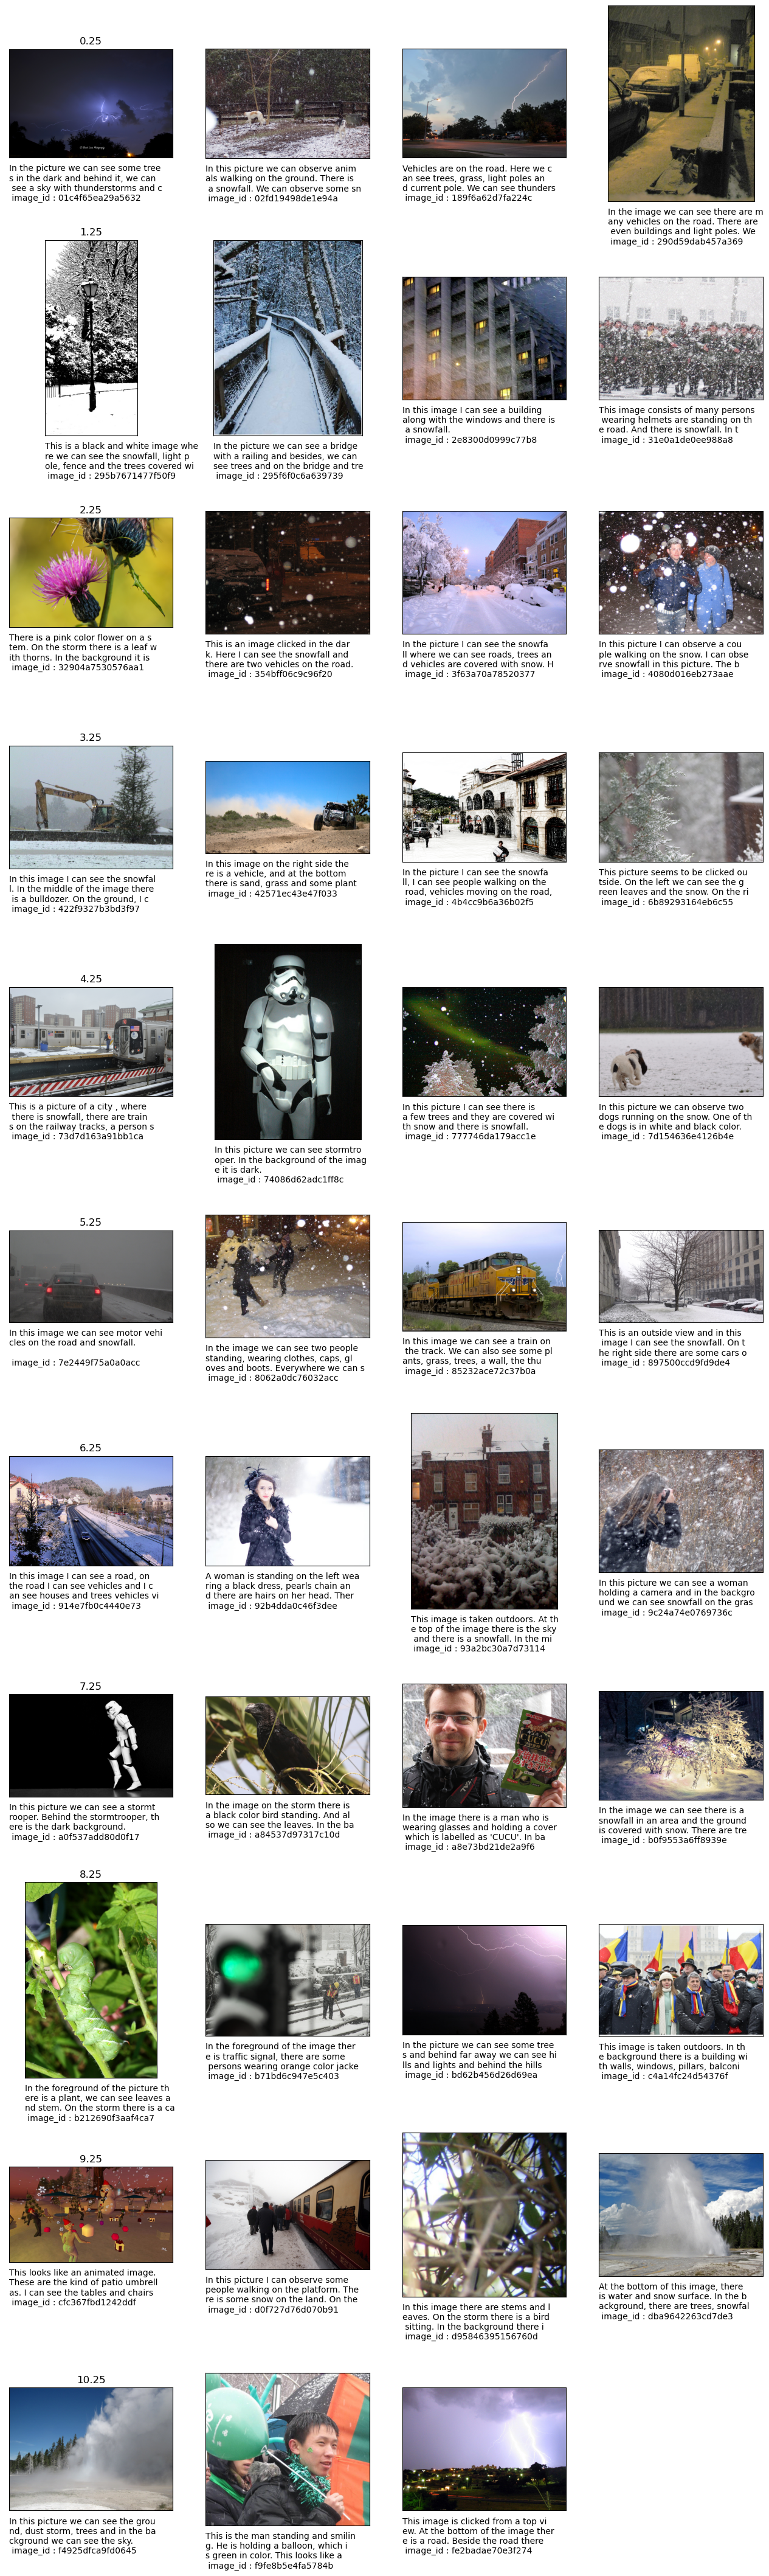

In [111]:
## show img status

back = 0
plt.figure(figsize=(16,500))
for i in range(len(find[back:])):
    plt.subplot(100,4,i+1)
    if i % 4 == 0:
        plt.title(f"{(i+1+back)/4}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    f_num = find['image_id'][i+back][0]
    
    path = '../../disk/Data/open_image/train_'+f_num+"/" + find['image_id'][i+back] +'.jpg'
    im_bgr = cv2.imread(path)
    im_rgb = im_bgr[:, :, ::-1]
    plt.imshow(im_rgb, cmap=plt.cm.binary)
    plt.xlabel(find['caption'][i+back][:35] + '\n' + find['caption'][i+back][35:70] + '\n' 
               + find['caption'][i+back][70:105] + '\n image_id : ' + str(find['image_id'][i+back]) , loc='left', fontsize=10)
    #plt.legend(find['image_id'][i])
plt.show()

In [2]:
disaster_dataset = ['0218f76dff06752d', '02eab4f9ad6c0334', '0693141ad6ca7df3', '0bdfcf59dd6b55ce',
                     '0ff480920c9928c5', '101b499a52d7f46a', '112caf3e075e5394', '132eac17a04c4517',
                    '1550f14052bfec04', '183c1d7389c3b9ea', '1b24087aa0f9867b', '1df5638d77ff56cb',
                    '1e2a454911be0c5f', '2341349abfc26e90', '24f67cf7b161ea6b', '2b3651e8ba31ee65',
                    '2c67ed27579a6ea8', '345744962c7f4265', '34d50632542ecbb7', '35242c3f7a36c7bb', 
                    '36aee059e225bdaf', '3c6bf73ad74f1cd0', '3d789ac66fb6f955', '3f297fa8108336de',
                    '3f75d6405bd8a83f', '56234c17e1d60456', '5b612117e5778a4f', '5c7d9dc0a050e458',
                    '5d9d3da7f32e3ed0', '5dc549862bd6b8be', '6210ca5e86ae3d4e', '626d848b9b97ac60',
                    '62f96f9bddee4d68', '676ed076e09c9831', '705926a75728804d', '73ec259eab888d00',
                    '7633472d1ca39fe2', '78d846a0565d3bcd', '7b9ec91e0a4e22a9', '7e8eb56044f4b6fd',
                    '7eaf75eb4e77e2fb', '818a844fd465ac22', '83b32c162d09a4f8', '84948dc5e331047f',
                    '85f047ee06e75976', '88f9239e83cdb66d', '8b8fc6e31886cf55', '8e81cdd4461f27c4',
                    '9272694dbd156cd5', '9e6328c01768659b', 'a052c41f030af85b', 'a0cfb16260ece855',
                    'a2a59c80cef68850', 'a2e91881336cf349', 'a7a0b76240849487', 'a8f397a0f65a323c',
                    'ade8e68f664d382f', 'b06aa91a6083c7c2', 'b3fec6a2d8c7536a', 'b85303b3bdfed978',
                    'b8bc1b2847a360f1', 'be4d426c54e723b4', 'be5fb6daa44a3de5', 'bf8d2df0e0e9c22d',
                    'bfdd567c7a0f948b', 'c5b72236f87adafc', 'c745a2779725f898', 'c9503eb51eee2f65', 
                    'cf2221aa10e29a2c', 'e22d5041146ddcf1', 'ef7aeb8f945dbab2', 'f5d7ec658b470898',
                    'fd00a73e3f447913','022b54e4e857ed33', '0de39b3791f2baa6', '15657f348712e734', '25099167e4022eba',
                    '26518efac4887b3c', '3797b764d267b064', '428509df148d1a27', '49aec59730a5a8aa',
                    '51255a7a1548080e', '52fde99971a5708c', '58d12e852edf194f', '5bbe14ccb14cd541', 
                    '64285be9eb0c2a46', '6c7b295c1bceb158', '6e16070bbbf48bde', '721af8090dfd27aa',
                    '874550cc18780297', '8a224c3b493fe762', '8cd19147d2c4f6b6', '91328c6645715517',
                    'a545a8059df4801f', 'b80089edc6bbc0ed', 'd0d6ed4f1ccd7041', 'd1db43f8dc0c3780', 
                    'e05bc81aa1d691d8', 'efd4e8e3e46acafc', 'f3c2b2265ca7bc45', 'fc365a2dd199e835',
                                        '00d425f0986ac579', '0128105921974df0', '01c4f65ea29a5632', '05b3130e553c6084',
                    '153e26395bea1973', '1656a46450a881f5', '17dba0da31436843', '189f6a62d7fa224c',
                    '2debae83fc6544cb', '4b2120ef0487e439', '502e1d8cb6b58911', '514efb5aee482d6f', 
                    '560e387f1b361a5c', '6a335f6ff3ffb6fd', 'bd62b456d26d69ea', 'd49698a15222f7fc',
                    'db1890e3518f1218', 'dc68faebac1558fa', 'dd4ceaf81843211a', 'e674841ecccb5a3c',
                    'fe2badae70e3f274', '002a6cf0d401929c', '009c5fb34590f1ca', '00c5ae08ce541b77','02272e5568435fda',
                    '043ac011ff8afcf5', '04f67c62ee67f74b', '0589d82e0437d121', '0604cb9341631e15',
                    '08fef6f3a0e3bbcb', '2c57d43b16d35db1', '3bba5ee24ec0ee54', '413a993b9bb464ab', 
                    '522c4fb0babb19f1', '55baf0e2c4186a11', '5763316a89f6298d', '6122e9cf06bd61ce',
                    '6414f33c90e89519', '65258f8026ee8751', '678db2a731a13646', '6f7fc1281ee41e62',
                    '7658e9d7ea54e4f6', '82e3aea3423ca41a', '96d9477747f15afd', 'a0f87eeae39baf57',
                    'b74e7055559d0264', 'b8422e374555ab8a', 'b853a26933571d66','c478c70805c110f6',
                    'da3ce31355e6391f','d6b1f98d28bf6e8a', 'd759ef76b9095152', 'dd45f271c163fe8c',
                    'e7cef9a8ab2593a2', '02fd19498de1e94a', '290d59dab457a369', '295b7671477f50f9', '2e8300d0999c77b8', 
                    '31e0a1de0ee988a8', '3f63a70a78520377', '4080d016eb273aae', '7e2449f75a0a0acc', 
                    '9c24a74e0769736c' 
                   ]
print(len(disaster_dataset))

164


#### 재난 데이터셋 이동

In [11]:
import shutil

tmp = []
dest = '../Data/open_image_disaster/'
path = '../../disk/Data/open_image/'
for img in disaster_dataset:
    from_path = path+'train_'+img[0]+'/'+img+'.jpg'
    if os.path.isfile(from_path) == True:
        to_path = dest+img+'.jpg'
        
        shutil.move(from_path,to_path)
        print(os.path.isfile(from_path))

#print(len(tmp))

In [24]:
captions = []
for img_id in disaster_dataset:
    cap = annotations[annotations['image_id'] == img_id]['caption'].value_counts().index
    for j in cap:
        #print(j)
        if len(j) < 250:
            captions.append(j.rstrip('\n').replace(",", ""))
print(captions)

['In the picture I can see two men are standing on the ground. These men are wearing helmets and holdings objects. In the background I can see trees the fire the grass plants the sky and some other objects on the ground.', 'There are plants walls windows chairs and other objects. These are damaged due to fire. And the background is dark in color.', 'In this image there are so many trees on the mountain at the back there is some fire and smoke.', 'In this image I can see a ladder which is in red color. Background I can see a house with fire and a building in white and brown color trees in green color and sky in white color.', 'This picture shows couple of men standing they wore sunglasses on their face and caps on their heads and we see trees and fire on the ground.', 'Here we can see trees fire and smoke. In the background there is sky.', 'At the bottom of this image I can see a campfire around this there are some stones. In the background there is a sea and I can see the trees.', 'In 

In [23]:
print(len(captions))

154
